In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
vehicles = pd.read_csv('/content/drive/MyDrive/vehicles.csv')

# 1. EDA

## 1) Overview of Data

In [ ]:
vehicles.shape

(426880, 26)

In [ ]:
vehicles.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
vehicles.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
id              426880 non-null int64
url             426880 non-null object
region          426880 non-null object
region_url      426880 non-null object
price           426880 non-null int64
year            425675 non-null float64
manufacturer    409234 non-null object
model           421603 non-null object
condition       252776 non-null object
cylinders       249202 non-null object
fuel            423867 non-null object
odometer        422480 non-null float64
title_status    418638 non-null object
transmission    424324 non-null object
VIN             265838 non-null object
drive           296313 non-null object
size            120519 non-null object
type            334022 non-null object
paint_color     296677 non-null object
image_url       426812 non-null object
description     426810 non-null object
county          0 non-null float64
state           426880 non-null obj

In [ ]:
vehicles.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

**Target**<br>
price - entry price : 등록 가격<br><br>
**설명변수**<br>
1) id - entry id<br>
2) url - listing URL<br>
3) region - craigslist region<br>
(craiglist - 미국의 지역 생활정보 사이트로 온라인 벼룩시장을 말함)<br>
4) region_url - region URL : 지역별 온라인 벼룩시장 링크<br>
5) year - entry year : 등록연도<br>
6) manufacturer - manufacturer of vehicle : 자동차 제조사<br>
7) model - model of vehicle : 자동차 모델명<br>
8) condition - condition of vehicle : 자동차의 상태<br>
9) cylinders - number of cylinders : 엔진의 기통 수<br>
10) fuel - fuel type : 연료 종류<br>
11) odometer - miles traveled by vehcile : 주행거리<br>
12) title_status - title status of vehicle : 차량등록증 상의 차량 상태 <br>
13) transmission - transmission of vehicle : 변속기 종류<br>
14) VIN - vehicle identification number : 차량의 등록번호 -> 차량의 등록번호 유무로 변수 생성??<br>
A: 차량의 등록번호는 차량등록증에 기재되어있는데, VIN의 null value의 수와 title_status의 'missing'의 수가 꽤 차이가 나기 때문에 단순 누락으로 판단, 차량의 등록번호 유무로 새로운 변수를 생성하지 않기로 했습니다.  
15) drive - type of drive : 차량의 구동방식 (ex 4wd 등등)<br>
16) size - size of vehicle : 차량의 사이즈(ex full-size, 등등)<br>
17) type - generic type of vehicle : 차량종류(ex 세단, suv 등등)<br>
18) paint_color - color of vehicle : 차량의 색깔<br>
19) image_URL - 차량 이미지 URL<br>
20) description - 차량에 대한 설명<br>
21) county - useless column left in by mistake<br>
22) state - state of listing : 위치하고 있는 state<br>
23) lat - latitude of listing<br>
24) long - longitude of listing <br>
25) posting_date - 업로드된 날짜 <br>
<br>
<br>
=> 해당 데이터들 중 price에 영향을 끼치지 않는 요소 삭제

In [ ]:
drop_cols = ['id', 'url', 'region', 'region_url', 'VIN', 'image_url', 'description',
            'county', 'state', 'lat', 'long', 'posting_date']
vehicles = vehicles.drop(columns = drop_cols)
vehicles.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2) Data Visualization

Text(0.5, 1.0, 'Price of the cars')

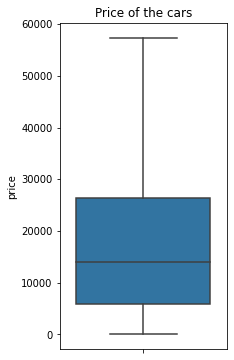

In [ ]:
plt.figure(figsize = (3, 6))
sns.boxplot(y = vehicles['price'], showfliers = False)
plt.title('Price of the cars')
#price = 진입가격

Text(0.5, 1.0, 'Number of cars by year')

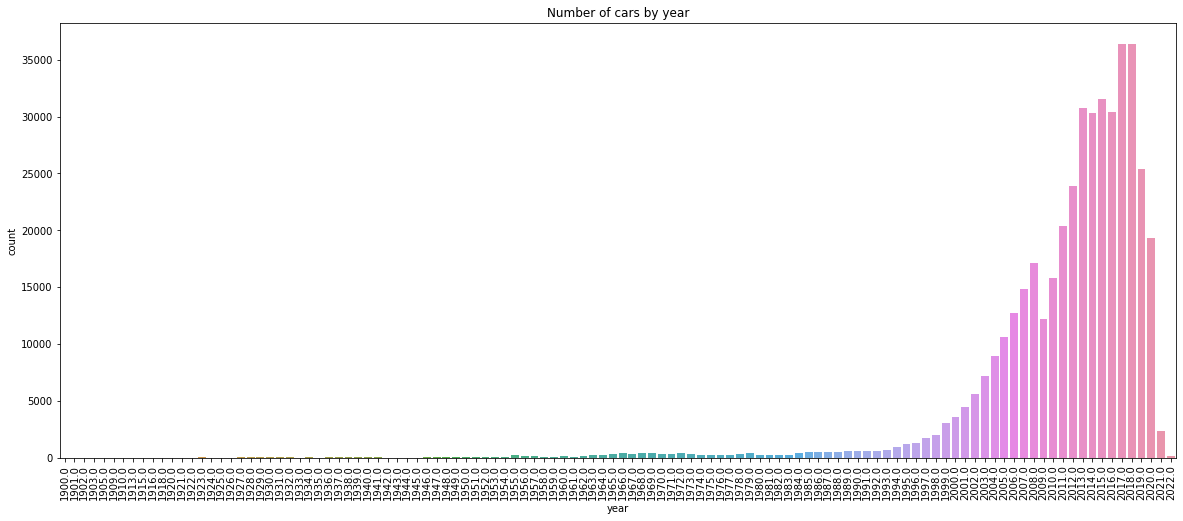

In [ ]:
plt.figure(figsize = (20, 8))
ax = sns.countplot(x = vehicles['year'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 10)
plt.title('Number of cars by year')

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


Text(0.5, 1.0, 'Number of cars by manufacturer')

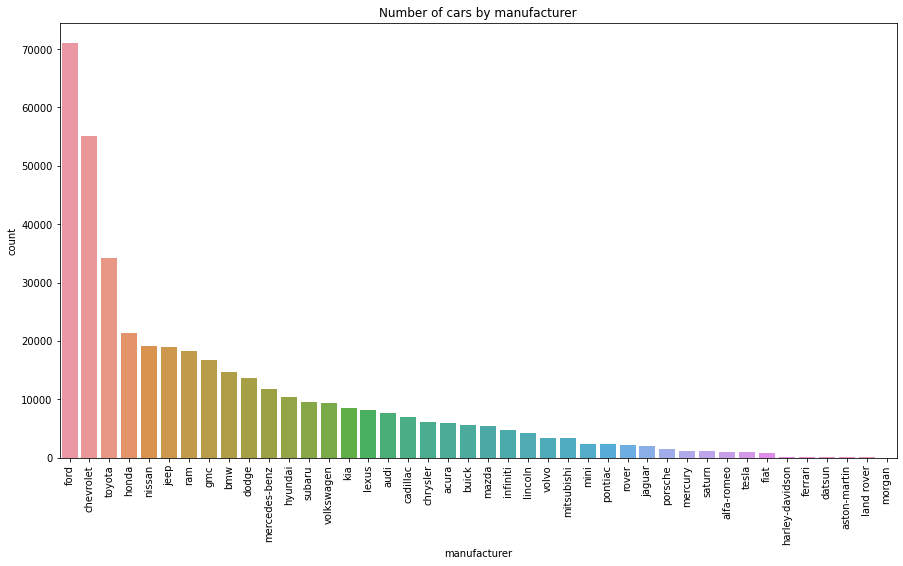

In [ ]:
print(vehicles['manufacturer'].value_counts())
plt.figure(figsize = (15, 8))
ax = sns.countplot(x = vehicles['manufacturer'], order = vehicles['manufacturer'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 10)
plt.title('Number of cars by manufacturer')
#회사, missing value 17600개

In [ ]:
vehicles['model'].value_counts()

f-150                     8009
silverado 1500            5140
1500                      4211
camry                     3135
silverado                 3023
                          ... 
replica                      1
2500 st 4wd                  1
silverado 3500hd ltz 4       1
228                          1
xc60 t6 platinum awd         1
Name: model, Length: 29667, dtype: int64

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64


Text(0.5, 1.0, 'Number of cars by condition')

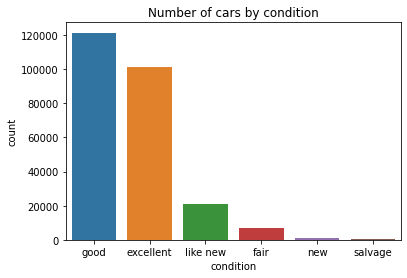

In [ ]:
print(vehicles['condition'].value_counts())
ax = sns.countplot(x = vehicles['condition'], order = vehicles['condition'].value_counts().index)
plt.title('Number of cars by condition')
#차 상태 missing value 174000개
#salvage: 매우 안 좋음

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64


Text(0.5, 1.0, 'Number of cars by number of cylinders')

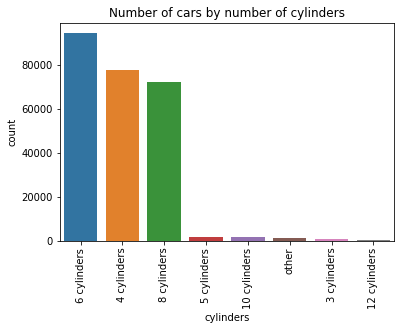

In [ ]:
print(vehicles['cylinders'].value_counts())
ax = sns.countplot(x = vehicles['cylinders'], order = vehicles['cylinders'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 10)
plt.title('Number of cars by number of cylinders')
#몇 기통인지 missing value 178000개

Text(0.5, 1.0, 'Number of cars by fuel')

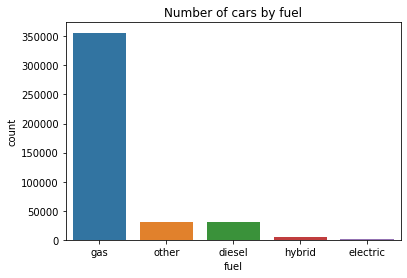

In [ ]:
vehicles['fuel'].value_counts()
ax = sns.countplot(x = vehicles['fuel'], order = vehicles['fuel'].value_counts().index)
plt.title('Number of cars by fuel')
#연료종류, missing value 3013개

Text(0.5, 1.0, 'Number of cars by odometer')

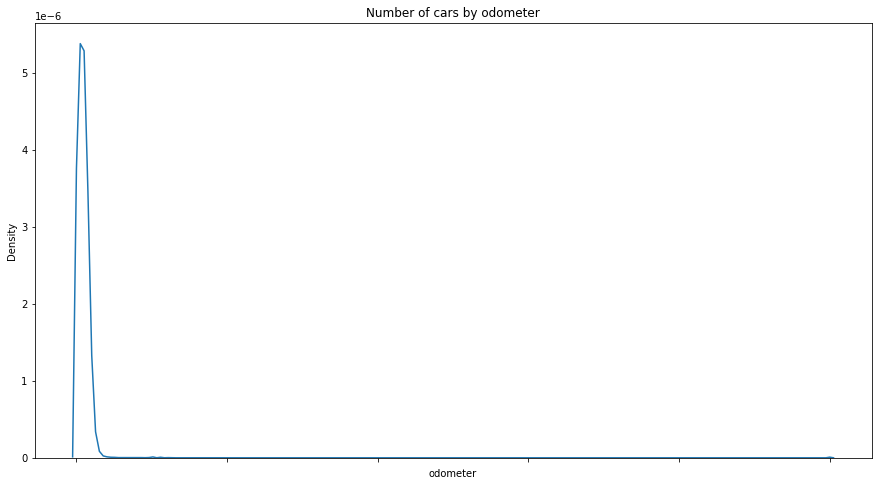

In [ ]:
plt.figure(figsize = (15, 8))
ax = sns.kdeplot(vehicles['odometer'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 10)
plt.title('Number of cars by odometer')
#차 주행거리, missing 4400개

clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: title_status, dtype: int64


Text(0.5, 1.0, 'Number of cars by its title_status')

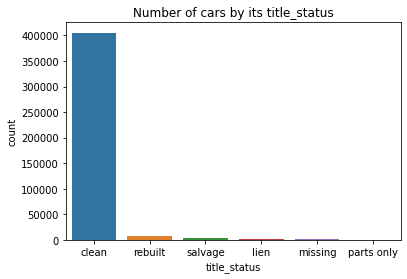

In [ ]:
print(vehicles['title_status'].value_counts())
ax = sns.countplot(x = vehicles['title_status'], order = vehicles['title_status'].value_counts().index)
plt.title('Number of cars by its title_status')

* model로 대체 가능한 manufacturer columns 삭제
* price=0 & 이상치 제거

In [ ]:
# manufacturer 삭제
vehicles.drop(['manufacturer'], axis=1, inplace=True)
# price=0인 행 제외
vehicles = vehicles.iloc[vehicles[vehicles['price']!=0].index,:]

In [ ]:
def get_outlier(df, column, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][(df[column] < lowest) | (df[column] > highest)].index
    return outlier_idx

# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(vehicles, 'price', weight=1.5)
vehicles.drop(outlier_idx, axis=0, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## 3) Missing Value

변수에서 결측치가 차지하는 비율

*   size 변수의 null값이 70% 이상으로 가장 많음
*   cylinders, condition, drive, paint_color, type 변수가 그 뒤를 이음


Text(0.5, 1.0, 'Total Missing Values (%)')

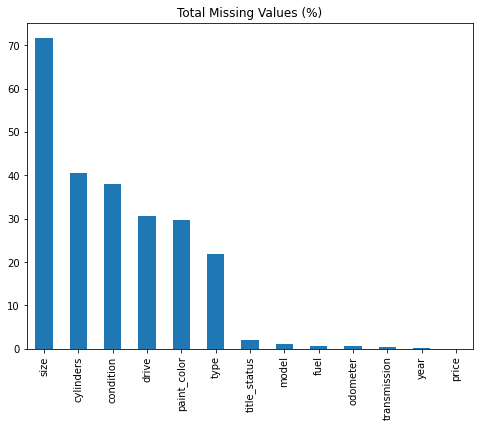

In [ ]:
missing_per = (vehicles.isnull().sum() / vehicles.isnull().count() * 100).sort_values(ascending=False)
missing_per.plot(kind='bar', figsize = (8,6))
plt.title('Total Missing Values (%)')

결측치 비율에 따른 처리 방법


*   50% 이상 : 컬럼 삭제
*   20% 이상 50% 미만 :
    - cramer's V를 통해 범주형 데이터 간 상관관계 파악
    - 상관관계 높은 변수 존재 O => datawig
    - 상관관계 높은 변수 존재 X => 비율에 따른 결측치 대체
*   20% 이하 : 행 삭제

### 1. 50% 이상

*   size
*   변수 컬럼 삭제

In [ ]:
# size 변수(null 약 70%) 제거
vehicles = vehicles.drop(['size'], axis=1)

In [ ]:
len(vehicles)

386206

### 2. 20% 미만
  - manufacturer, title_status, model, odometer, fuel, transmission, year, price
  - 결측치 포함 행 삭제

In [ ]:
under_20 = ['title_status','model', 'odometer','fuel','transmission','year','price']

In [ ]:
for c in under_20:
  vehicles.dropna(subset=[c], axis=0, inplace=True)
  vehicles.reset_index(drop=True, inplace=True)

In [ ]:
len(vehicles)

368813

### 3. 20%이상 50%미만
- cramer's V를 통한 상관관계 분석
- datawig / 비율에 따른 대체

In [ ]:
# 범주형 변수만 포함한 cat 생성
cat = vehicles.select_dtypes(include='object')

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

#수치형 변수간 상관계수의 척도로 사용되는 Cramer's V값을 계산해주는 함수 생성

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
  stat = chi2_contingency(crosstab)[0] 
  obs = np.sum(crosstab) 
  mini = min(crosstab.shape)-1 
  return (stat/(obs*mini))

In [ ]:
#관심있는 변수인 결측치 10%이상 50%미만인 변수들만 모아줌
cat1 = cat[['condition', 'paint_color', 'cylinders', 'drive', 'type']]

rows= []

for var1 in cat:
  col = []
  for var2 in cat1:
    cramers = cramers_V(cat[var1], cat1[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = cat1.columns, index = cat.columns)

df

,condition,paint_color,cylinders,drive,type
model,0.26,0.21,0.62,0.72,0.64
condition,1.00,0.01,0.01,0.01,0.02
cylinders,0.01,0.01,1.00,0.15,0.06
fuel,0.02,0.01,0.04,0.02,0.05
title_status,0.02,0.00,0.00,0.00,0.00
transmission,0.15,0.02,0.03,0.01,0.09
drive,0.01,0.01,0.15,1.00,0.30
type,0.02,0.01,0.06,0.30,1.00
paint_color,0.01,1.00,0.01,0.01,0.01


In [ ]:
vehicles.head()

,price,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,33590,2014.0,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white
1,22590,2010.0,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue
2,39590,2020.0,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red
3,30990,2017.0,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red
4,15000,2013.0,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black


cylinders, drive, type은 model과 상관계수가 상당히 높습니다. 
따라서 cylinder, drive, type 변수의 결측치는 model을 이용한 datawig를 통해 결측치를 대체합니다.

상관성이 높은 변수가 없는 condition, paint_color의 경우 각 클래스별 비율에 맞춰 결측치 대치합니다.

In [ ]:
! pip install datawig

In [ ]:
import datawig

1) Cylinders


In [ ]:
vehicles['cylinders'].isnull().sum()

150528

In [ ]:
imputer = datawig.SimpleImputer(input_columns=['model'],
                                output_column='cylinders')
imputer.fit(train_df=vehicles, num_epochs=6, batch_size=1000)
cyl_null = vehicles[vehicles['cylinders'].isnull()]
Imputed_cyl = imputer.predict(cyl_null)
imputed_cylinders = pd.DataFrame(Imputed_cyl)

2022-02-22 03:04:44,095 [INFO]  
========== start: fit model
2022-02-22 03:04:44,096 [WARNING]  Already bound, ignoring bind()
2022-02-22 03:06:24,045 [INFO]  Epoch[0] Batch [0-99]	Speed: 1000.96 samples/sec	cross-entropy=1.338471	cylinders-accuracy=0.766740
2022-02-22 03:08:02,034 [INFO]  Epoch[0] Train-cross-entropy=1.043917
2022-02-22 03:08:02,036 [INFO]  Epoch[0] Train-cylinders-accuracy=0.784716
2022-02-22 03:08:02,040 [INFO]  Epoch[0] Time cost=197.936
2022-02-22 03:08:02,050 [INFO]  Saved checkpoint to "cylinders/model-0000.params"
2022-02-22 03:08:21,344 [INFO]  Epoch[0] Validation-cross-entropy=0.645360
2022-02-22 03:08:21,346 [INFO]  Epoch[0] Validation-cylinders-accuracy=0.813864
2022-02-22 03:10:01,425 [INFO]  Epoch[1] Batch [0-99]	Speed: 999.25 samples/sec	cross-entropy=0.600285	cylinders-accuracy=0.818450
2022-02-22 03:11:39,927 [INFO]  Epoch[1] Train-cross-entropy=0.567045
2022-02-22 03:11:39,929 [INFO]  Epoch[1] Train-cylinders-accuracy=0.826030
2022-02-22 03:11:39,933 

In [ ]:
vehicles['cylinders'].fillna(imputed_cylinders['cylinders_imputed'], inplace = True)

In [ ]:
vehicles['cylinders'].isnull().sum()

0

2) Drive

In [ ]:
vehicles.rename(columns={'drive':'drive_n'}, inplace=True)

In [ ]:
vehicles['drive_n'].isnull().sum()

111325

In [ ]:
imputer = datawig.SimpleImputer(input_columns=['model'],
                                output_column='drive_n')
imputer.fit(train_df=vehicles, num_epochs=6, batch_size=1000)
drive_null = vehicles[vehicles['drive_n'].isnull()]
Imputed_drive = imputer.predict(drive_null)
imputed_drive = pd.DataFrame(Imputed_drive)

In [ ]:
imputed_drive

,price,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive_n,type,paint_color,drive_n_imputed,drive_n_imputed_proba
0,33590,2014.0,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,4wd,0.982688
1,22590,2010.0,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,4wd,0.824750
2,39590,2020.0,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,4wd,0.943555
3,30990,2017.0,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,4wd,0.940121
12,24590,2017.0,silverado 1500 regular,good,6 cylinders,gas,40784.0,clean,other,NaN,pickup,white,4wd,0.944678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368795,30990,2019.0,romeo giulia ti sedan 4d,good,4 cylinders,other,3883.0,clean,other,NaN,sedan,blue,rwd,0.981258
368796,27590,2018.0,Genesis G80 3.8 Sedan 4D,good,6 cylinders,gas,36138.0,clean,other,NaN,sedan,black,rwd,0.988726
368798,29590,2016.0,4runner sr5 sport utility,good,6 cylinders,gas,53475.0,clean,automatic,NaN,SUV,black,4wd,0.887426
368804,17990,2018.0,sportage lx sport utility 4d,good,6 cylinders,gas,34239.0,clean,other,NaN,SUV,NaN,fwd,0.915652


In [ ]:
vehicles['drive_n'].fillna(imputed_drive['drive_n_imputed'], inplace = True)

In [ ]:
vehicles['drive_n'].isnull().sum()

0

3) Type

In [ ]:
vehicles['type'].isnull().sum()

80917

In [ ]:
imputer = datawig.SimpleImputer(input_columns=['model'],
                                output_column='type')
imputer.fit(train_df=vehicles, num_epochs=6, batch_size=1000)
type_null = vehicles[vehicles['type'].isnull()]
Imputed_type = imputer.predict(type_null)
imputed_type = pd.DataFrame(Imputed_type)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
vehicles['type'].fillna(imputed_type['type_imputed'], inplace = True)

In [ ]:
vehicles['type'].isnull().sum()

0

4) Condition

In [ ]:
# condition 변수의 NaN 개수:
vehicles['condition'].isnull().value_counts()

False    230978
True     137835
Name: condition, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


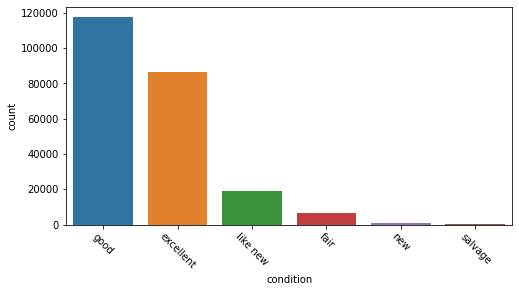

In [ ]:
# condition 변수의 countplot
plt.figure(figsize=(8,4))
plt.xticks(rotation = -45)
sns.countplot(vehicles['condition'], order = vehicles['condition'].value_counts().index)

In [ ]:
# 각 범주가 차지하는 비율
round(vehicles['condition'].value_counts(normalize = True),2)

good         0.51
excellent    0.37
like new     0.08
fair         0.03
new          0.00
salvage      0.00
Name: condition, dtype: float64

In [ ]:
vehicles['condition'] = vehicles['condition'].fillna(pd.Series(np.random.choice(['good', 'excellent', 'like new', 'fair', 'new', 'salvage'], 
                                                      p=[0.48, 0.4, 0.08, 0.03, 0.01, 0.0], size=len(vehicles))))

In [ ]:
vehicles['condition'].isnull().sum()

0

5) Paint Color

In [ ]:
# paint_color 변수의 NaN 개수: 130203개
vehicles['paint_color'].isnull().value_counts()

False    263973
True     104840
Name: paint_color, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


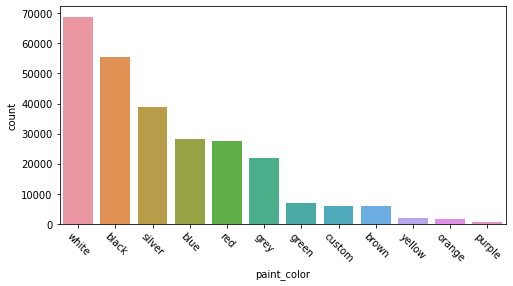

In [ ]:
# paint_color 변수의 countplot
plt.figure(figsize=(8,4))
plt.xticks(rotation = -45)
sns.countplot(vehicles['paint_color'], order = vehicles['paint_color'].value_counts().index)

In [ ]:
# 각 범주가 차지하는 비율
round(vehicles['paint_color'].value_counts(normalize = True),2)

white     0.26
black     0.21
silver    0.15
blue      0.11
red       0.10
grey      0.08
green     0.03
custom    0.02
brown     0.02
yellow    0.01
orange    0.01
purple    0.00
Name: paint_color, dtype: float64

In [ ]:
vehicles['paint_color'] = vehicles['paint_color'].fillna(pd.Series(np.random.choice(['white', 'black', 'silver', 'blue', 'red', 'grey', 'green', 'custom', 'brwon', 'yellow', 'orange', 'purpe'], 
                                                      p=[0.27, 0.21, 0.15, 0.11, 0.10, 0.08, 0.02, 0.02, 0.02, 0.01, 0.01, 0.00], size=len(vehicles))))

In [ ]:
# 대부분의 사람들이 흰색 차 선호(아니면 검은색, 회색 등 무채색 선호)
vehicles['paint_color'].isnull().sum()

0

* 마지막으로, 중복되는 행 삭제

In [ ]:
vehicles.drop(vehicles[vehicles.duplicated()].index,inplace=True)
vehicles.reset_index(drop=False, inplace=True)

#### Save DataFrame as CSV

In [ ]:
vehicles.to_csv('/content/drive/MyDrive/vehicles_imputed.csv', index = False)

In [ ]:
vehicles_new= pd.read_csv('/content/drive/MyDrive/vehicles_imputed.csv')

In [ ]:
len(vehicles_new)

256666

In [ ]:
vehicles_new.isnull().sum()

index           0
price           0
year            0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive_n         0
type            0
paint_color     0
dtype: int64

# 2. Data Preprocessing

In [ ]:
vehicles_new.head()

,index,price,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive_n,type,paint_color
0,0,33590,2014.0,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,pickup,white
1,1,22590,2010.0,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,pickup,blue
2,2,39590,2020.0,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,4wd,pickup,red
3,3,30990,2017.0,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,4wd,pickup,red
4,4,15000,2013.0,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black


In [ ]:
vehicles_new.drop(['index'], axis=1, inplace=True)

## 1) Target - Predictor 

In [ ]:
y = vehicles_new['price']
X = vehicles_new.drop(['price'], axis=1)

In [ ]:
X.head()

,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive_n,type,paint_color
0,2014.0,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,pickup,white
1,2010.0,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,pickup,blue
2,2020.0,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,4wd,pickup,red
3,2017.0,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,4wd,pickup,red
4,2013.0,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black


In [ ]:
y.head()

0    33590
1    22590
2    39590
3    30990
4    15000
Name: price, dtype: int64

## 2) Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
X_cat = X.select_dtypes(include=['object'])
X_num = X.select_dtypes(include=['float64'])

In [ ]:
X_cat_col = X_cat.columns
for i in X_cat_col:
    X[i] = le.fit_transform(X[i])

In [ ]:
X.head()

,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive_n,type,paint_color
0,2014.0,21016,2,6,2,57923.0,0,2,0,8,11
1,2010.0,21321,2,6,2,71229.0,0,2,0,8,1
2,2020.0,21344,2,6,2,19160.0,0,2,0,8,9
3,2017.0,23932,2,6,2,41124.0,0,2,0,8,9
4,2013.0,12652,0,5,2,128000.0,0,0,2,10,0


## 3) Train-Test


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# 3. Model

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### Evaluation

In [ ]:
def evaluation(y, pred):
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mean_squared_error(y, pred))
    r_squared = r2_score(y, pred)
    return mae, rmse, r_squared

## 1) LightGBM

In [ ]:
! pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
train_set = lgb.Dataset(X_train, y_train)
valid_set = lgb.Dataset(X_test, y_test)

In [ ]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'learning_rate': 0.01,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'min_data_in_leaf':800,
        'metric': 'rmse'
}

lgb_reg = lgb.train(params, train_set = train_set, num_boost_round=20000,
                   early_stopping_rounds=8000,verbose_eval=500, valid_sets=valid_set)



Training until validation scores don't improve for 8000 rounds.
[500]	valid_0's rmse: 6515.1
[1000]	valid_0's rmse: 6284.15
[1500]	valid_0's rmse: 6191.24
[2000]	valid_0's rmse: 6132.27
[2500]	valid_0's rmse: 6087.91
[3000]	valid_0's rmse: 6057.27
[3500]	valid_0's rmse: 6033.27
[4000]	valid_0's rmse: 6009.58
[4500]	valid_0's rmse: 5990.41
[5000]	valid_0's rmse: 5972.95
[5500]	valid_0's rmse: 5956.67
[6000]	valid_0's rmse: 5942.69
[6500]	valid_0's rmse: 5927.16
[7000]	valid_0's rmse: 5913.68
[7500]	valid_0's rmse: 5903.04
[8000]	valid_0's rmse: 5891.77
[8500]	valid_0's rmse: 5881.88
[9000]	valid_0's rmse: 5873.24
[9500]	valid_0's rmse: 5864.09
[10000]	valid_0's rmse: 5856.37
[10500]	valid_0's rmse: 5849.08
[11000]	valid_0's rmse: 5841.84
[11500]	valid_0's rmse: 5834.37
[12000]	valid_0's rmse: 5826.7
[12500]	valid_0's rmse: 5819.95
[13000]	valid_0's rmse: 5812.22
[13500]	valid_0's rmse: 5805.96
[14000]	valid_0's rmse: 5799.47
[14500]	valid_0's rmse: 5792.05
[15000]	valid_0's rmse: 5785.5

In [ ]:
y_pred_lgb = lgb_reg.predict(X_test)
print(evaluation(y_test, y_pred_lgb))

(3392.5229685635627, 5731.34527891697, 0.7768910285548012)


## 2) Polynomial

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

#cross validation score 계산하기
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_poly, y = y_train, cv = 10)

#train set의 R2 score 계산하기
y_pred_poly2_train = regressor_poly2.predict(X_poly)
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

#test set의 R2 score 계산하기
y_pred_poly2_test = regressor_poly2.predict(poly_reg.transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

#test set의 RMSE 계산하기
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))

#점수 종합
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.5619715902794061
R2_score (train):  0.5663544076852205
R2_score (test):  0.5686198350783853
RMSE:  7969.446177130174
